In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Heart.csv")

Cleaveland database.

1. Hungarian Institute of Cardiology. Budapest.
2. University Hospital, Zurich, Switzerland.
3. University Hospital, Basel, Switzerland.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.

Our Data contains:

   1. age - age in years
   2. sex - (1 = male; 0 = female)
   3. cp - chest pain type    // categorical values.
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
   4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
   5. chol - serum cholestoral in mg/dl
            serum = LDL + HDL + .2 * triglycerides
            above 200 is cause for concern
   6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
            '>126' mg/dL signals diabetes
   7. restecg - resting electrocardiographic results   // categorical values.
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
   8. thalach - maximum heart rate achieved   
   9. exang - exercise induced angina (1 = yes; 0 = no)
   
  10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
  11. slope - the slope of the peak exercise ST segment    // categorical values.
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart   
  12. ca - number of major vessels (0-3) colored by flourosopy    // categorical values.
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
  13. thal - thalium stress result    // categorical values. 
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
  14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


 Lets see first five rows of our dataset.


In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let see how many patients are suffering from heart disease in dataset.

In [68]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [69]:
noofpatientshavingdisease=len(df[df.target==1])
noofpatientsnothavingdisease=len(df[df.target==0])
totalpatients=len(df.target)
print("percentage of patients suffering from heart disease: {:.4f}%".format((noofpatientshavingdisease/totalpatients)*100))
print("percentage of patients not suffering from heart disease: {:.4f}%".format((noofpatientsnothavingdisease/totalpatients)*100))


percentage of patients suffering from heart disease: 54.4554%
percentage of patients not suffering from heart disease: 45.5446%


let visualize with respect to gender

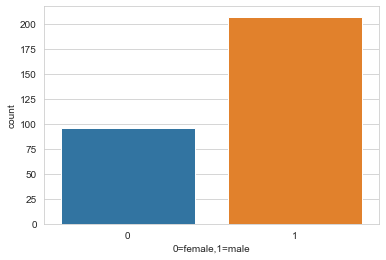

In [70]:
sns.countplot(x="sex",data=df)
plt.xlabel("0=female,1=male")
plt.show()

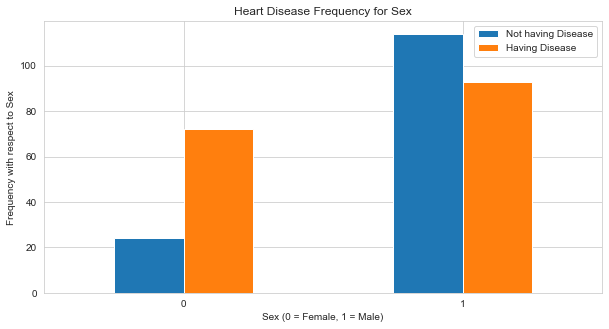

In [71]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Not having Disease", "Having Disease"])
plt.ylabel('Frequency with respect to Sex')
plt.xticks(rotation=0)
plt.show()

lets see with respect to age.(frequency table)

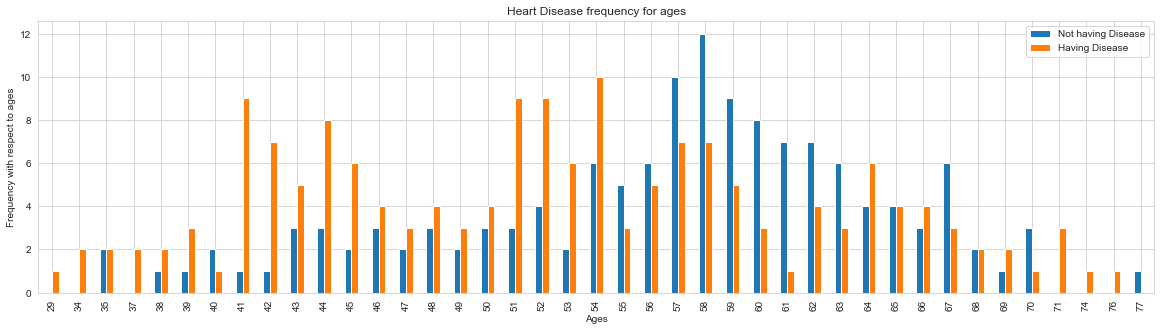

In [72]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,5))
plt.title("Heart Disease frequency for ages")
plt.xlabel("Ages")
plt.legend(["Not having Disease", "Having Disease"])
plt.ylabel("Frequency with respect to ages")
plt.show()

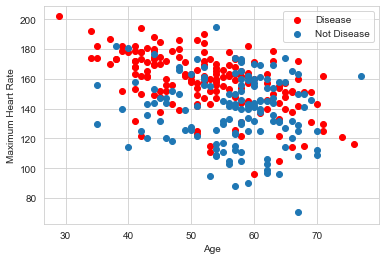

In [73]:
#thalach : (here maximum heart rate)
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

lets see with respect to blood sugar

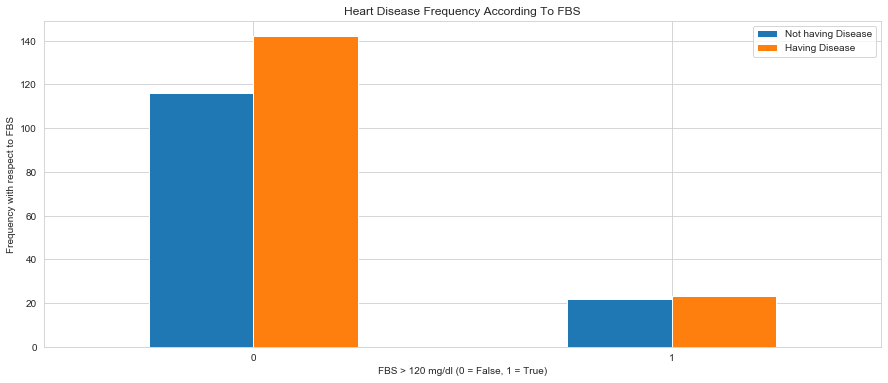

In [74]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS > 120 mg/dl (0 = False, 1 = True)')
plt.legend(["Not having Disease", "Having Disease"])
plt.ylabel('Frequency with respect to FBS')
plt.xticks(rotation=0)
plt.show()

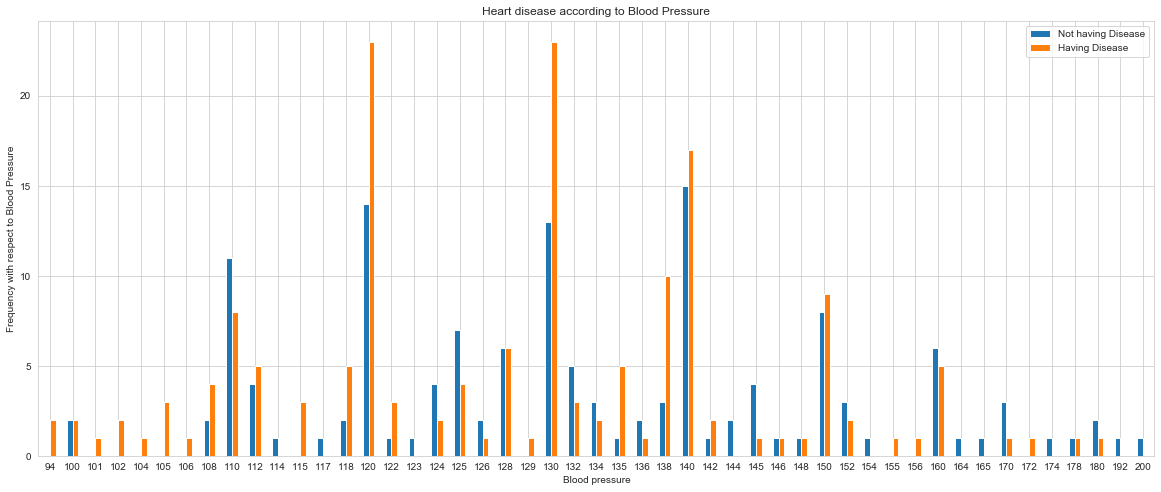

In [75]:
#trestbps(blood pressure)
pd.crosstab(df.trestbps,df.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart disease according to Blood Pressure')
plt.xlabel('Blood pressure')
plt.xticks(rotation=0)
plt.legend(["Not having Disease", "Having Disease"])
plt.ylabel('Frequency with respect to Blood Pressure')
plt.show()

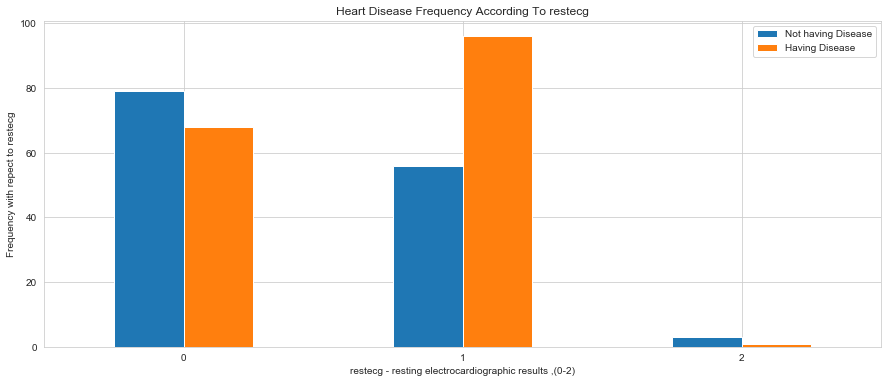

In [76]:

pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To restecg')
plt.xlabel('restecg - resting electrocardiographic results ,(0-2)' )
plt.xticks(rotation = 0)
plt.legend(["Not having Disease", "Having Disease"])
plt.ylabel('Frequency with repect to restecg')
plt.show()

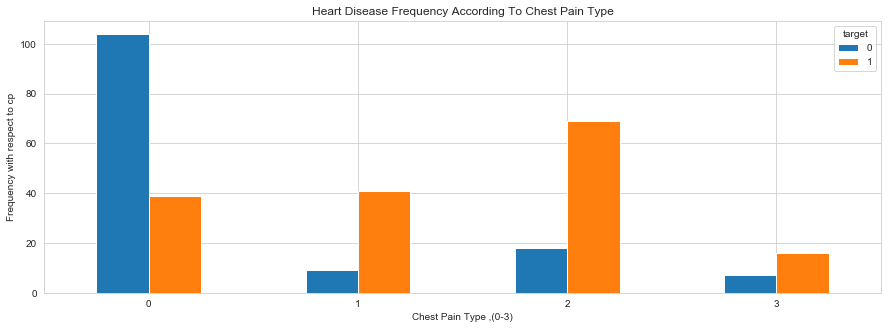

In [77]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type ,(0-3)')
plt.xticks(rotation = 0)
plt.ylabel('Frequency with respect to cp')
plt.show()

As we can see that chest pain(cp),restecg, slope ,ca ,thal are alloted numbers according to some category,we create dummy variables for that.


In [78]:
a= pd.get_dummies(df['cp'],prefix="cp")
b= pd.get_dummies(df['restecg'],prefix="restecg")
c= pd.get_dummies(df['slope'],prefix="slope")
d= pd.get_dummies(df['thal'],prefix="thal")
e= pd.get_dummies(df['ca'],prefix="ca")

In [79]:
frames=[df,a,b,c,d,e]
df=pd.concat(frames,axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,1,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,1,0,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,1,0,1,0,0,0,0


In [80]:
df = df.drop(columns=['cp','restecg' , 'slope','thal','ca'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,1,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,0,0,1,0,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,1,0,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,1,0,1,0,0,0,0


In [81]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)


In [82]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [84]:

print("Train feature shape" ,x_train.shape)
print("Test feature shape" , x_test.shape)



Train feature shape (227, 27)
Test feature shape (76, 27)


In [85]:
accuracies_model={}

#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies_model['Logistic Regression']=acc
print("Test Accuracy of Logistic Regression Algorithm {:.4f}%".format(acc))

Test Accuracy of Logistic Regression Algorithm 84.2105%


In [87]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies_model['Support Vector Machine']=acc
print("Test Accuracy of Support Vector Machine Algorithm: {:.4f}%".format(acc))

Test Accuracy of Support Vector Machine Algorithm: 84.2105%


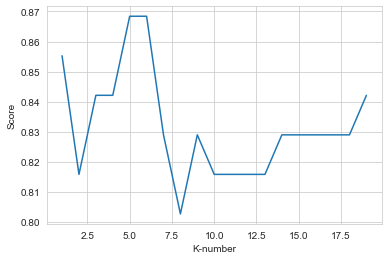

In [88]:
# K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
X=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    X.append(knn.score(x_test,y_test))
    
plt.plot(range(1,20),X)
plt.xlabel("K-number")
plt.ylabel("Score")
plt.show()

In [89]:
bestScore=max(X)*100
print("K-nearest Neighbors Accuracy =",format(bestScore))
accuracies_model['K-nearest Neighbors']=bestScore

K-nearest Neighbors Accuracy = 86.8421052631579


In [90]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies_model['Random Forest']=acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 84.21%


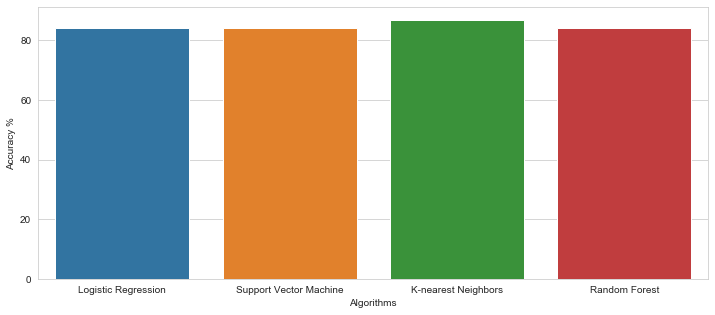

In [91]:
plt.figure(figsize=(12,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies_model.keys()), y=list(accuracies_model.values()))
plt.show()

In [92]:
y_head_lr = lr.predict(x_test)
y_head_svm=svm.predict(x_test)
knn2=KNeighborsClassifier(n_neighbors=6)
knn2.fit(x_train,y_train)

y_head_knn=knn2.predict(x_test)

y_head_rf=rf.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_rf =  confusion_matrix(y_test,y_head_rf)

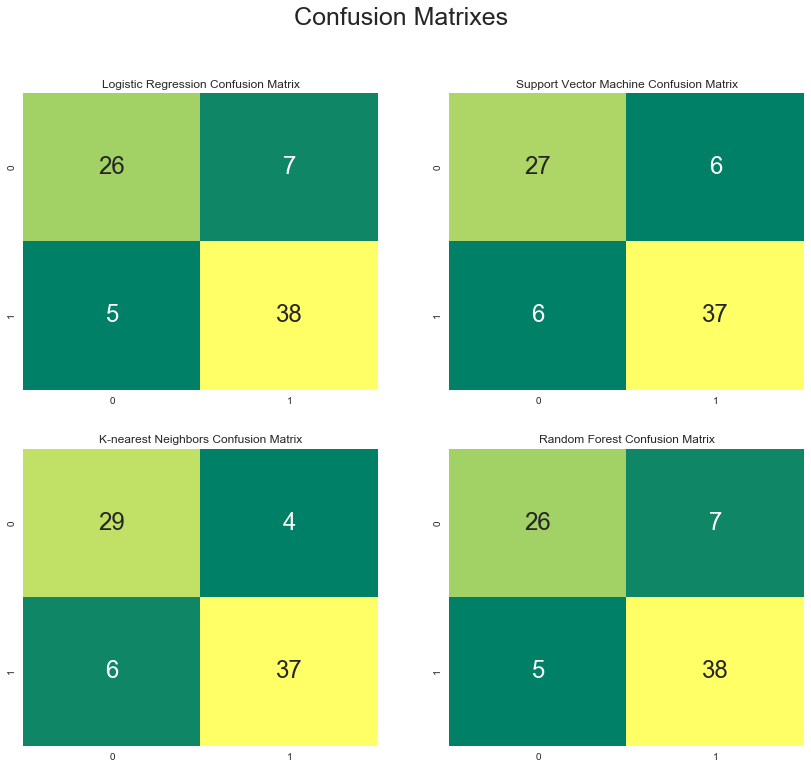

In [94]:
plt.figure(figsize=(14,12))

plt.suptitle("Confusion Matrixes",fontsize=25)


plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="summer",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,2,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="summer",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("K-nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="summer",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="summer",fmt="d",cbar=False, annot_kws={"size": 24})